# Lab 10 MNIST and Softmax

## Lab10-1-mnist_softmax
### - Accuracy = 0.9023

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
tf.set_random_seed(777)  # reproducibility

In [3]:
''' DataSets 클래스(tf 객체)
        train, validation, test의 멤버변수 가지고 있음!!
        images : 이미지 데이터셋
        labels : label 데이터셋
        num_examples : 데이터 갯수
        next_batch : 데이터셋으로부터 필요한 만큼의 데이터를 반환하는 함수'''
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
# parameters
learning_rate = 0.001
training_epochs = 15    # 15번 반복할 것!!
batch_size = 100    # 한 번에 train시킬 때 100개씩!!

In [5]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])     # n x 784
Y = tf.placeholder(tf.float32, [None, 10])      # n x 10 (output 종류가 10개; 0~9)

In [6]:
# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

In [7]:
hypothesis = tf.matmul(X, W) + b

In [8]:
# define cost/loss & optimizer (using AdamOptimizer)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [9]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [10]:
# train my model
for epoch in range(training_epochs):    # training_epochs만큼 반복해서 training
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)     # batch_size 크기만큼 데이터 반환해줌!!
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 5.745170984
Epoch: 0002 cost = 1.780056711
Epoch: 0003 cost = 1.122778637
Epoch: 0004 cost = 0.872012248
Epoch: 0005 cost = 0.738203186
Epoch: 0006 cost = 0.654728888
Epoch: 0007 cost = 0.596023608
Epoch: 0008 cost = 0.552216820
Epoch: 0009 cost = 0.518254961
Epoch: 0010 cost = 0.491113188
Epoch: 0011 cost = 0.468347537
Epoch: 0012 cost = 0.449374351
Epoch: 0013 cost = 0.432675659
Epoch: 0014 cost = 0.418828158
Epoch: 0015 cost = 0.406128930
Learning Finished!


In [11]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9023


In [12]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)      # mnist test set의 데이터수 - 1
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))    # mnist test set의 data 하나 뽑기
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Label:  [6]
Prediction:  [6]


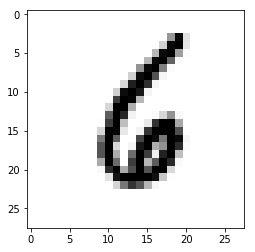

'\nEpoch: 0001 cost = 5.888845987\nEpoch: 0002 cost = 1.860620173\nEpoch: 0003 cost = 1.159035648\nEpoch: 0004 cost = 0.892340870\nEpoch: 0005 cost = 0.751155428\nEpoch: 0006 cost = 0.662484806\nEpoch: 0007 cost = 0.601544010\nEpoch: 0008 cost = 0.556526115\nEpoch: 0009 cost = 0.521186961\nEpoch: 0010 cost = 0.493068354\nEpoch: 0011 cost = 0.469686249\nEpoch: 0012 cost = 0.449967254\nEpoch: 0013 cost = 0.433519321\nEpoch: 0014 cost = 0.419000337\nEpoch: 0015 cost = 0.406490815\nLearning Finished!\nAccuracy: 0.9035\n'

In [13]:
# 실제 데이터 한 번 확인!!
plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

'''
Epoch: 0001 cost = 5.888845987
Epoch: 0002 cost = 1.860620173
Epoch: 0003 cost = 1.159035648
Epoch: 0004 cost = 0.892340870
Epoch: 0005 cost = 0.751155428
Epoch: 0006 cost = 0.662484806
Epoch: 0007 cost = 0.601544010
Epoch: 0008 cost = 0.556526115
Epoch: 0009 cost = 0.521186961
Epoch: 0010 cost = 0.493068354
Epoch: 0011 cost = 0.469686249
Epoch: 0012 cost = 0.449967254
Epoch: 0013 cost = 0.433519321
Epoch: 0014 cost = 0.419000337
Epoch: 0015 cost = 0.406490815
Learning Finished!
Accuracy: 0.9035
'''
